# Quantifying Crowded Trades(QCT): A Comprehensive Analysis
### Asset_centrality
### Collins Emezie Ugwuozor, Jayesh Chandra Gupta, Emmanuel Effiong Asuquo

In [ ]:
#pip install yahoo_fin
#pip install yfinance
#pip install pandas_datareader

In [ ]:
#Import the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [ ]:
# Pick up table of S&P 500 listed companies from Wikipedia.
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [ ]:
table = data[0]
table.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
table['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

In [ ]:
# Select sectors of S&P 500
industrials_sector = table[table['GICS Sector'] == 'Industrials'] # XLI
health_sector = table[table['GICS Sector'] == 'Health Care'] # XLV
tech_sector = table[table['GICS Sector'] == 'Information Technology'] # XLK
consumer_staples_sector = table[table['GICS Sector'] == 'Consumer Staples'] # XLP
utilities_sector = table[table['GICS Sector'] == 'Utilities'] # XLU
financial_sector = table[table['GICS Sector'] == 'Financials'] # XLF
consumer_discretionary_sector = table[table['GICS Sector'] == 'Consumer Discretionary'] # XLY
materials_sector = table[table['GICS Sector'] == 'Materials'] # XLB
real_estate_sector = table[table['GICS Sector'] == 'Real Estate'] # XLRE
communication_services_sector = table[table['GICS Sector'] == 'Communication Services'] # XLC *XTL
energy_sector = table[table['GICS Sector'] == 'Energy'] # XLE

In [ ]:
# Define dates for five year historical prices
start_date = "2018-01-01"
end_date = "2023-01-01"

In [ ]:
# Get financial assets and tech assets
financial_assets = financial_sector['Symbol'].tolist()
tech_assets = tech_sector['Symbol'].tolist()
print(financial_assets)
print(tech_assets)

['AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'ACGL', 'AJG', 'AIZ', 'BAC', 'BK', 'BRK.B', 'BLK', 'BX', 'BRO', 'COF', 'CBOE', 'SCHW', 'CB', 'CINF', 'C', 'CFG', 'CME', 'CMA', 'DFS', 'EG', 'FDS', 'FIS', 'FITB', 'FI', 'FLT', 'BEN', 'GPN', 'GL', 'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JKHY', 'JPM', 'KEY', 'L', 'MTB', 'MKTX', 'MMC', 'MA', 'MET', 'MCO', 'MS', 'MSCI', 'NDAQ', 'NTRS', 'PYPL', 'PNC', 'PFG', 'PGR', 'PRU', 'RJF', 'RF', 'SPGI', 'STT', 'SYF', 'TROW', 'TRV', 'TFC', 'USB', 'V', 'WRB', 'WFC', 'WTW', 'ZION']
['ACN', 'ADBE', 'AMD', 'AKAM', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'CDNS', 'CDW', 'CSCO', 'CTSH', 'GLW', 'ENPH', 'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT', 'IT', 'GEN', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'JBL', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MU', 'MSFT', 'MPWR', 'MSI', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PTC', 'QRVO', 'QCOM', 'ROP', 'CRM', 'STX', 'NOW', 'SWKS', 'SNPS', 'TEL', 'TDY', 'TER', 'TXN', 'TRMB', 'TYL', 'VRSN', 'WDC', 'ZBRA']


In [ ]:
# Get the  "Adj Close" data from Yahoo Finance
def get_asset_data (asset_data, start, end):
  df_asset = yf.download(asset_data, start=start_date, end=end_date)['Adj Close']

  # Select the Top 10 assets based on ROI
  roi = (df_asset.iloc[-1] - df_asset.iloc[0])/ df_asset.iloc[0]
  top_10_ROI = roi.sort_values(ascending = False).head(10)
  roi_tickers = top_10_ROI.index.tolist()
  # Get the  "Adj Close" data of top 10 from Yahoo Finance
  df_prices = yf.download(roi_tickers, start=start_date, end=end_date)['Adj Close']
  # Calculate daily returns for Top ROI Stocks
  df_assets= df_prices.pct_change().dropna()
  return df_assets

In [ ]:
# Assets across finance sector
df_financial_assets =get_asset_data (financial_assets, start=start_date, end=end_date)

[*********************100%%**********************]  72 of 72 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  10 of 10 completed


In [ ]:
# Standardize the data and calculate covariance matrix of financial assets
scaler = StandardScaler()
financial_assets_scaled = scaler.fit_transform(df_financial_assets)
financial_assets_cov = np.cov(financial_assets_scaled.T)

df_financial_assets.head()

,AJG,AON,BRO,BX,MA,MMC,MSCI,NDAQ,PGR,WRB
Date,,,,,,,,,,
2018-01-03,0.007560,0.015971,0.011355,0.014760,0.012573,0.013060,0.015194,0.011989,-0.000542,-0.008281
2018-01-04,0.009259,0.013699,0.002710,0.007879,0.012937,0.010436,0.015738,0.013263,-0.000181,0.004031
2018-01-05,0.004587,0.008492,0.009460,-0.007516,0.020731,0.006926,0.010406,0.006608,0.003796,-0.004158
2018-01-08,0.000630,0.000073,-0.003060,0.008179,0.003023,-0.010619,0.001353,0.009468,0.003061,-0.005039
2018-01-09,0.001259,0.002489,0.008057,0.013822,0.001444,0.000000,0.006681,0.002626,0.008438,-0.004486


#### Step 1: Calculate Asset Centrality For Financial Assets

## Absorbtion Ratio $$AR = \frac{\sum_{i=1}^n \sigma^2E_i}{\sum_{j=1}^N \sigma^2A_j}$$

- $N$ = number of assets
- $n$ = number of eigenvectors
- $\sigma^2E_i$ = variance of the $i^{th}$ eigenvector
- $\sigma^2A_j$ = variance of the $j^{th}$ asset

The fraction of the total variance that is "absorbed"/explained by a fixed number of eigenvectors

We will Calculate the Absorbsion Ratio(AR) for Assets using:
- PCA
- Eigen decomposition of Covariance matrix
- Eigen values and sum of variance of original data

The absorption ratio:
- Measures the degree of concentration within a set of assets.
- Represents the portion of variability in asset returns that can be attributed to a specific number of factors in a Principal Component Analysis (PCA).
- When elevated, indicates a propensity for shocks to rapidly disseminate across a wide spectrum.

In [ ]:
# AR calculation using PCA
n = 2
sectors_pca = PCA(n_components=n)
sectors_pca.fit(df_financial_assets)
ar_pca = np.sum(sectors_pca.explained_variance_ratio_)
print(f'The percent of explained variance in the first {n} principal components = {ar_pca}')

# AR calculation using eigen decompostion of covariance matrix
w, v = np.linalg.eig(financial_assets_cov)
sorted_eigenvalues = w.argsort()[::-1]
var_ratio = [eig/np.sum(w) for eig in w[sorted_eigenvalues]]
print(f'The percent of explained variance in the first {n} eigen vectors = {np.sum(var_ratio[0:2])}')

# AR calculation using eigen values and sum of variances of original data
ar_num = np.sum(w[sorted_eigenvalues][0:n])
ar_denom = np.sum(np.var(financial_assets_scaled, axis=0))
ar = ar_num/ar_denom
print(f'The absorbtion ratio of the first {n} eigen vectors over original X variance = {ar}')

The percent of explained variance in the first 2 principal components = 0.7281315561173722
The percent of explained variance in the first 2 eigen vectors = 0.7219445325594486
The absorbtion ratio of the first 2 eigen vectors over original X variance = 0.7225188718852712


## Centrality  $$C_i = \frac {\sum_{j=1}^n \biggl( AR^j  \frac{| EV_i^j |}{\sum_{k=1}^N | EV_k^j |} \biggr)}{\sum_{j=1}^n AR^j} $$

- $C_i$ = asset's centrality score
- $AR^j$ = absorbtion ratio of the $j^th$ eigenvector
- $EV_i^j$ = absolute value of the exposure of the $i^th$ sector within the $j^th$ eigenvector
- $n$ = number of eigenvectors in the numerator of the absorbtion ratio
- $N$ = total number of assets

In [ ]:
def centrality_score(X, n=2):
    N = X.shape[1]
    pca_model = PCA(n_components=n)
    pca_model.fit(X)
    EV = pca_model.components_
    AR = pca_model.explained_variance_ratio_
    C_list = []
    for i in range(N):
        C_num = []
        C_denom = []
        for j in range(n):
            C_num.append(AR[j] * \
                    (abs(EV[j][i])/\
                     sum([abs(EV[j][k]) for k in range(N)])))
            C_denom.append(AR[j])

        C_list.append(sum(C_num)/sum(C_denom))
    return C_list

To assess asset centrality, we will follow these steps:
- Gather five years of historical daily returns for individual assets.
- Assign weights to each historical return based on the square root of their respective market capitalization weights.
- Calculate the covariance matrix of the assets.
- Determine the asset centrality using the top two eigenvectors.


In [ ]:
df_financial_assets.columns.to_list()

['AJG', 'AON', 'BRO', 'BX', 'MA', 'MMC', 'MSCI', 'NDAQ', 'PGR', 'WRB']

In [ ]:
import yfinance as yf

tickers = ['AJG', 'AON', 'BRO', 'BX', 'MA', 'MMC', 'MSCI', 'NDAQ', 'PGR', 'WRB']
date = "2018-01-02"

def get_market_cap_on_date(ticker, date):
    try:
        stock_data = yf.Ticker(ticker)
        info = stock_data.get_info()

        market_cap = info.get('marketCap')

        if market_cap is not None:
            return market_cap
        else:
            print(f"No market cap data found for {ticker} on {date}.")
            return None
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Calculate market cap for each ticker on the specified date
for ticker in tickers:
    market_cap_on_date = get_market_cap_on_date(ticker, date)
    if market_cap_on_date is not None:
        print(f"{ticker} market cap not found on {date} hence we approximate with: {market_cap_on_date}")
    else:
        print(f"Unable to fetch market cap for {ticker} on {date}.")


AJG market cap not found on 2018-01-02 hence we approximate with: 48107130880
AON market cap not found on 2018-01-02 hence we approximate with: 62153052160
BRO market cap not found on 2018-01-02 hence we approximate with: 19771025408
BX market cap not found on 2018-01-02 hence we approximate with: 156476882944
MA market cap not found on 2018-01-02 hence we approximate with: 392524922880
MMC market cap not found on 2018-01-02 hence we approximate with: 92263628800
MSCI market cap not found on 2018-01-02 hence we approximate with: 42043301888
NDAQ market cap not found on 2018-01-02 hence we approximate with: 31583064064
PGR market cap not found on 2018-01-02 hence we approximate with: 89790873600
WRB market cap not found on 2018-01-02 hence we approximate with: 18107772928


In [ ]:
# Get the Market Capitalization
tickers= df_financial_assets.columns.to_list()
def get_market_cap(ticker):
    try:
        stock_data = yf.Ticker(ticker)
        market_cap = stock_data.info.get('marketCap')

        if market_cap is not None:
            return market_cap
        else:
            return None
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

In [ ]:
#Since, Yahoo Finance does not have feature to get Mkt Cap on old dates, we have taken Mkt cap from Bloomberg as of 2Jan18 in USDmn
market_cap = [11240.27,32859.05,7120.74,39000.05,160821.59,41032.69,11499.99,12756.2,32197.38,8530.50]

In [ ]:
weights=[]
for i in range(10):
    weights.append(market_cap[i]/(np.array(market_cap)).sum())
weights

[0.031480195147875784,
 0.09202708710500797,
 0.019942784719342594,
 0.10922595140302796,
 0.4504068885526476,
 0.11491868866515584,
 0.03220758303836296,
 0.03572580243582522,
 0.09017397319195293,
 0.023891045740801097]

In [ ]:
# multiply the returns by the square root of market weights of each asset
asset_weights = dict(zip(df_financial_assets.columns, [weight * 100 for weight in weights]))
weighted_df = df_financial_assets.copy()
for asset in df_financial_assets.columns:
    weighted_df.loc[:,asset] = weighted_df.loc[:, asset] * asset_weights[asset]**.5
weighted_df.head()

,AJG,AON,BRO,BX,MA,MMC,MSCI,NDAQ,PGR,WRB
Date,,,,,,,,,,
2018-01-03,0.013413,0.048448,0.016035,0.048781,0.084381,0.044273,0.027269,0.022660,-0.001627,-0.012800
2018-01-04,0.016428,0.041556,0.003827,0.026039,0.086826,0.035377,0.028245,0.025068,-0.000543,0.006231
2018-01-05,0.008139,0.025762,0.013358,-0.024841,0.139124,0.023478,0.018674,0.012490,0.011400,-0.006427
2018-01-08,0.001117,0.000222,-0.004321,0.027032,0.020288,-0.035998,0.002428,0.017896,0.009193,-0.007789
2018-01-09,0.002234,0.007552,0.011378,0.045682,0.009693,0.000000,0.011990,0.004965,0.025338,-0.006934


In [ ]:
print(f'Not scaled - {sorted(zip(tickers,[np.around(C,3) for C in centrality_score(df_financial_assets)]), key=lambda x: x[1], reverse=True)}')

unscaled_scores = dict(zip(tickers, [np.around(C,3) for C in centrality_score(df_financial_assets)]))

Not scaled - [('BX', 0.149), ('MSCI', 0.122), ('MA', 0.108), ('AJG', 0.096), ('BRO', 0.096), ('WRB', 0.093), ('AON', 0.088), ('MMC', 0.086), ('NDAQ', 0.082), ('PGR', 0.078)]


In [ ]:
print(f'Scaled - {sorted(zip(tickers,[np.around(C,3) for C in centrality_score(financial_assets_scaled)]), key=lambda x: x[1], reverse=True)}')

scaled_scores = dict(zip(tickers, [np.around(C,3) for C in centrality_score(financial_assets_scaled)]))

Scaled - [('AJG', 0.109), ('BRO', 0.107), ('MMC', 0.105), ('MSCI', 0.103), ('BX', 0.1), ('MA', 0.1), ('NDAQ', 0.098), ('AON', 0.097), ('WRB', 0.095), ('PGR', 0.087)]


In [ ]:
print(f'Weighted - {sorted(zip(tickers,[np.around(C,3) for C in centrality_score(weighted_df)]), key=lambda x: x[1], reverse=True)}')

weighted_scores = dict(zip(tickers, [np.around(C,3) for C in centrality_score(weighted_df)]))

Weighted - [('MA', 0.32), ('BX', 0.163), ('MMC', 0.095), ('AON', 0.088), ('MSCI', 0.072), ('PGR', 0.07), ('NDAQ', 0.056), ('AJG', 0.051), ('WRB', 0.043), ('BRO', 0.042)]


In [ ]:
# Create a dataframe of scores computed from different methods
for asset in unscaled_scores:
    unscaled_scores[asset] = [unscaled_scores[asset], scaled_scores[asset], weighted_scores[asset]]
scores_df = pd.DataFrame(data=unscaled_scores, index=['Unscaled', 'Scaled', 'Weighted'])
scores_df

,AJG,AON,BRO,BX,MA,MMC,MSCI,NDAQ,PGR,WRB
Unscaled,0.096,0.088,0.096,0.149,0.108,0.086,0.122,0.082,0.078,0.093
Scaled,0.109,0.097,0.107,0.100,0.100,0.105,0.103,0.098,0.087,0.095
Weighted,0.051,0.088,0.042,0.163,0.320,0.095,0.072,0.056,0.070,0.043


In [ ]:
# rolling 1-year centrality score
rolling_Cs = [centrality_score(weighted_df.iloc[i-252:i,:]) for i in range(252, weighted_df.shape[0]+1)]

<Axes: title={'center': 'Financial Assets 1-year Rolling Centrality Score'}>

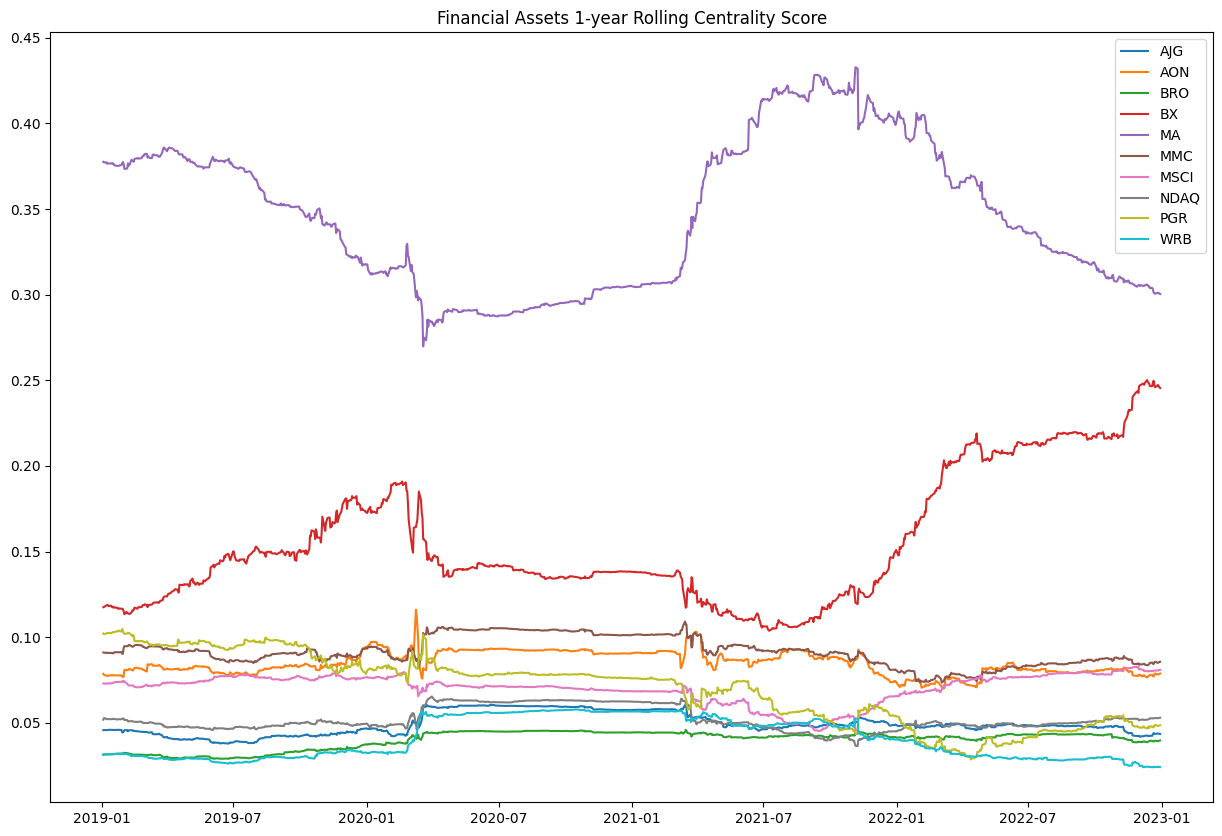

In [ ]:
pd.DataFrame(data=rolling_Cs, columns=df_financial_assets.columns, index=[date.date() for date in df_financial_assets.index[251:]]).plot(figsize=(15,10), title='Financial Assets 1-year Rolling Centrality Score')

# Relative Value


$$RV_{asset} =  (Price-to-Book Ratio)/(5-Year Average Price-to-Book Ratio)/(Average of Normalized Valuations Across All Assets) $$

- $RV$ = Relative Value

To determine the relative value of an asset, we will follow these steps:
- ACROSS ASSETS:
- Calculate the price-to-book value ratio for each asset.
- Normalize the valuation of each asset by dividing it by its own 5-year average. This adjustment accounts for variations in valuations across assets.
- Further, divide each asset's normalized valuation by the average of the normalized valuations of all other assets. This yields a cross-sectional measure of relative value, facilitating a comparative assessment of relative worth

In [ ]:
# Get the Price-to-Book ratio
def get_price_to_book(ticker):
    try:
        stock_data = yf.Ticker(ticker)
        book_value = stock_data.info.get('bookValue')
        price = stock_data.history(period='1d')['Close'].iloc[-1]

        if book_value is not None and price is not None and book_value != 0:
            price_to_book = price / book_value
            return price_to_book
        else:
            return None
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

In [ ]:
price_book = [get_price_to_book(ticker) for ticker in tickers]
print(price_book)

[4.597338234985943, -106.38450742830062, 3.7990813311114033, 12.873917316866107, 62.27793592087766, 8.08747871881348, -40.0769011678109, 4.158626580450262, 5.310325856281262, 2.620149299279967]


In [ ]:
# Calculate the five-year average P/B
def calculate_five_year_average(ticker):
    end_date = datetime.strptime("2023-01-01", "%Y-%m-%d")
    start_date = end_date - timedelta(days=5 * 365)  # Five years ago

    try:
        stock_data = yf.Ticker(ticker)
        historical_data = stock_data.history(start=start_date, end=end_date)['Close']
        book_value = stock_data.info.get('bookValue')

        if book_value is not None and not historical_data.empty:
            pb_ratios = historical_data / book_value
            five_year_average = pb_ratios.mean()
            return five_year_average
        else:
            return None
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

In [ ]:
five_year_ave_price_book = [calculate_five_year_average(ticker) for ticker in tickers]
print(five_year_ave_price_book)

[2.26717147030986, -71.87994590698692, 2.3645520782118825, 6.024123246714, 42.58382512045025, 4.885958882527211, -25.24977560629431, 3.1473666575441577, 2.829188545342704, 1.627190230110451]


In [ ]:
#Normalized by dividing it's current p/b value with asset's 5-year_p/b
normalize = []
for i in range(10):
    value = price_book[i] / five_year_ave_price_book[i]
    normalized_value = round(value, 3)
    normalize.append(normalized_value)
print(tickers)
print(normalize)

['AJG', 'AON', 'BRO', 'BX', 'MA', 'MMC', 'MSCI', 'NDAQ', 'PGR', 'WRB']
[2.028, 1.48, 1.607, 2.137, 1.462, 1.655, 1.587, 1.321, 1.877, 1.61]


In [ ]:
weights = []
for i in range(10):
    value = normalize[i] * five_year_ave_price_book[i] / (np.array(five_year_ave_price_book)).sum()
    weights.append(abs(value))
weights

[0.1464258975653274,
 3.3879347181282085,
 0.12101252886082638,
 0.4099812044289363,
 1.9827027940882778,
 0.2575214341735188,
 1.2761450081910228,
 0.132408459756327,
 0.16911874222734852,
 0.08343144786925935]

In [ ]:
relative_scores = dict(zip(tickers, [np.around(r,2) for r in weights]))

In [ ]:
relative_scores

{'AJG': 0.15,
 'AON': 3.39,
 'BRO': 0.12,
 'BX': 0.41,
 'MA': 1.98,
 'MMC': 0.26,
 'MSCI': 1.28,
 'NDAQ': 0.13,
 'PGR': 0.17,
 'WRB': 0.08}

In [ ]:
# Create a dataframe of computed scores
for asset in relative_scores:
    relative_scores[asset] = [relative_scores[asset]]
scores_df = pd.DataFrame(data = relative_scores, index=['Weighted_score'])
scores_df

,AJG,AON,BRO,BX,MA,MMC,MSCI,NDAQ,PGR,WRB
Weighted_score,0.15,3.39,0.12,0.41,1.98,0.26,1.28,0.13,0.17,0.08


In [ ]:
# Define relative values for each sector
relative_values = np.array([0.15,	3.4,	0.12,	0.42,	1.99,	0.26,	1.28,	0.13,	0.17,	0.08])
# Create a dictionary with sector names and their corresponding relative values
sector_relative_values = dict(zip(df_financial_assets.columns, relative_values))

# Create a copy of the original DataFrame
weighted_df = df_financial_assets.copy()

# Iterate over each sector
for sector in df_financial_assets.columns:
    # Multiply the returns in each sector by the square root of its relative value
    weighted_df.loc[:, sector] = weighted_df.loc[:, sector] * sector_relative_values[sector] ** 0.5

# Display the first few rows of the resulting DataFrame
weighted_df.head()

,AJG,AON,BRO,BX,MA,MMC,MSCI,NDAQ,PGR,WRB
Date,,,,,,,,,,
2018-01-03,0.002928,0.029448,0.003933,0.009566,0.017736,0.006659,0.017191,0.004323,-0.000223,-0.002342
2018-01-04,0.003586,0.025259,0.000939,0.005106,0.018250,0.005321,0.017806,0.004782,-0.000075,0.001140
2018-01-05,0.001777,0.015659,0.003277,-0.004871,0.029243,0.003531,0.011773,0.002383,0.001565,-0.001176
2018-01-08,0.000244,0.000135,-0.001060,0.005301,0.004264,-0.005415,0.001531,0.003414,0.001262,-0.001425
2018-01-09,0.000488,0.004590,0.002791,0.008958,0.002037,0.000000,0.007559,0.000947,0.003479,-0.001269


In [ ]:
# Calculate rolling 1-year relative scores across assets
rolling_relative_scores = weighted_df.rolling(window=252).mean()

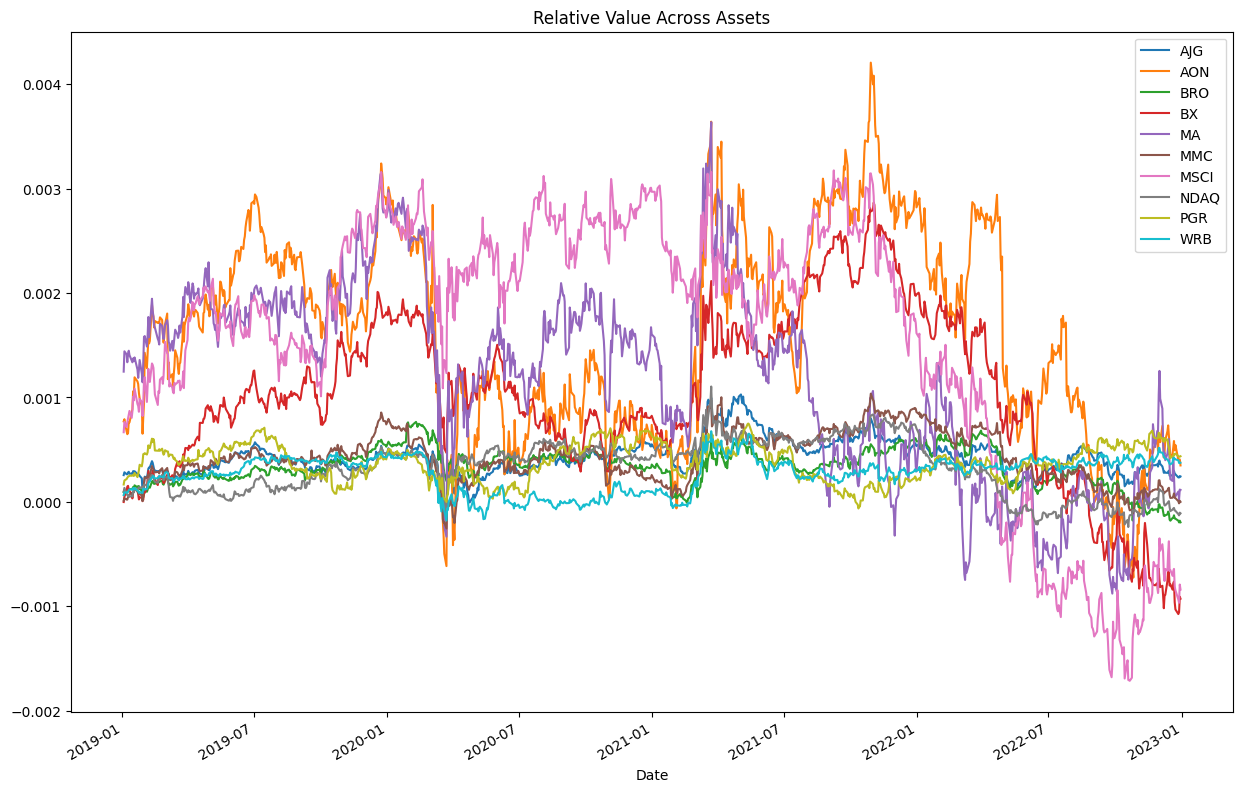

In [ ]:
# Plot the relative values
rolling_relative_scores.plot(figsize=(15, 10), title='Relative Value Across Assets')
# Show the plot
plt.show()

# Centrality and Relative Value Combined

In [ ]:
# Download Financial assets From S&P500 Financial Sector
def retrieve_financial_sector_assets():
    data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    table = data[0]
    financial_sector = table[table['GICS Sector'] == 'Financials']  # XLF
    financial_sector_assets = financial_sector['Symbol'].tolist()
    return financial_sector_assets

# Select the top 10 assets based on ROI
def get_top_assets(asset_data, start, end):
    df_asset = yf.download(asset_data, start=start, end=end)['Adj Close']
    roi = (df_asset.iloc[-1] - df_asset.iloc[0]) / df_asset.iloc[0]
    top_10_ROI = roi.sort_values(ascending=False).head(10)
    roi_tickers = top_10_ROI.index.tolist()
    df_prices = yf.download(roi_tickers, start=start, end=end)['Adj Close']
    df_assets = df_prices.pct_change().dropna()
    return df_assets

# Calculate Centrality
def download_sector_data(symbols, start_date, end_date):
    df_sectors = yf.download(symbols, start=start_date, end=end_date)['Adj Close']
    df_sectors = df_sectors.pct_change().dropna()
    return df_sectors

def preprocess_data(df_sectors):
    scaler = StandardScaler()
    df_sectors_scaled = scaler.fit_transform(df_sectors)
    return df_sectors_scaled

def calculate_weight(market_cap):
    weights = [cap / np.sum(market_cap) for cap in market_cap]
    return weights

def calculate_weighted_df(df_sectors, market_cap):
    weights = calculate_weight(market_cap)
    sector_weights = dict(zip(df_sectors.columns, [weight * 100 for weight in weights]))

    weighted_df = df_sectors.copy()

    for sector in df_sectors.columns:
        weighted_df.loc[:, sector] *= np.sqrt(sector_weights[sector])

    return weighted_df

def calculate_centrality_score(X, n=2):
    pca_model = PCA(n_components=n)
    pca_model.fit(X)
    EV = pca_model.components_
    AR = pca_model.explained_variance_ratio_

    C_list = []
    for i in range(X.shape[1]):
        C_num = sum(AR[j] * abs(EV[j][i]) / sum(abs(EV[j][k]) for k in range(X.shape[1])) for j in range(n))
        C_denom = sum(AR[j] for j in range(n))
        C_list.append(C_num / C_denom)

    return C_list

# Calculate Relative Value
def fetch_sector_data(symbols, start_date, end_date):
    df_sectors_prices = yf.download(symbols, start=start_date, end=end_date)['Adj Close']
    df_sectors = df_sectors_prices.pct_change().dropna()
    return df_sectors

# Normalized by dividing its current p/b value with the asset's 5-year_p/b
def calc_normalize_price(price_book, five_year_ave_price_book):
    normalized_prices = [pb / five_pb for pb, five_pb in zip(price_book, five_year_ave_price_book)]
    return normalized_prices

def calc_asset_weight(normalized_price, five_year_ave_price_book):
    weights = [np * five_pb / sum(five_year_ave_price_book) for np, five_pb in zip(normalized_price, five_year_ave_price_book)]
    return weights

def calculate_relative_measure(normalized_prices, weights):
    normalized_prices = np.nan_to_num(normalized_prices, nan=0.0)
    weighted_average = np.dot(weights, normalized_prices)
    relative_measure = np.zeros_like(normalized_prices)
    nonzero_indices = (weighted_average != 0)
    relative_measure[nonzero_indices] = normalized_prices[nonzero_indices] / weighted_average[nonzero_indices]
    return relative_measure

def create_relative_scores_df(symbols, normalized_prices, weights):
    relative_measure = calculate_relative_measure(normalized_prices, weights)
    relative_scores = dict(zip(symbols, [np.around(r, 2) for r in relative_measure]))
    for asset in relative_scores:
        relative_scores[asset] = [relative_scores[asset]]
    scores_df = pd.DataFrame(data=relative_scores, index=['Relative_score'])
    scores_df = scores_df.transpose()
    return scores_df

# Combine Centrality and Relative Value
def combine_centrality_relative_value(weighted_df, symbols, normalized_prices, weights):
    centrality_scores = calculate_centrality_score(weighted_df)
    scores_df = create_relative_scores_df(symbols, normalized_prices, weights)

    centrality_df = pd.DataFrame(data=centrality_scores, columns=['Centrality'], index=symbols)
    relative_df = create_relative_scores_df(symbols, normalized_prices, weights)

    combined_scores_df = pd.concat([centrality_df, relative_df], axis=1)
    print(combined_scores_df)

    combined_scores_df.index.name = 'Ticker'
    return combined_scores_df

# Construct portfolios for assets with no bubbles, bubbles rising, & bubbles falling
def construct_portfolios(df_sectors, symbols, normalized_prices, weights):
    combined_scores_df = combine_centrality_relative_value(weighted_df, symbols, normalized_prices, weights)

    try:
        top_crowded = combined_scores_df.sort_values(by='Centrality', ascending=False).head(5).index
        top_overvalued = combined_scores_df.sort_values(by='Relative_score', ascending=False).head(5).index
    except KeyError as e:
        print(f"Error: {e}")
        return None, None, None

    if top_crowded.empty or top_overvalued.empty:
        print("Error: Top crowded or top overvalued is empty.")
        return None, None, None

    print("Top Five Crowded Sectors:", top_crowded)
    print("Top Five Overvalued Sectors:", top_overvalued)

    next_day_returns = df_sectors.shift(-1)

    no_bubble_portfolio = combined_scores_df[~combined_scores_df.index.isin(top_crowded.union(top_overvalued))]
    bubble_run_up_portfolio = combined_scores_df[combined_scores_df.index.isin(top_crowded) & ~combined_scores_df.index.isin(top_overvalued)]
    bubble_sell_off_portfolio = combined_scores_df[combined_scores_df.index.isin(top_crowded) & combined_scores_df.index.isin(top_overvalued)]

    return no_bubble_portfolio, bubble_run_up_portfolio, bubble_sell_off_portfolio, next_day_returns

# Impute Values below:
if __name__ == "__main__":
    # Input the timeframe
    start_date = "2018-01-01"
    end_date = "2023-01-01"
    financial_sector_assets = retrieve_financial_sector_assets()
    df_financial_assets = get_top_assets(financial_sector_assets, start=start_date, end=end_date)

    # Allow symbols of top 10 assets or input other 10 preferred asset tickers as symbols
    symbols = df_financial_assets.columns.tolist()
    # symbols = ['AJG', 'AON', 'BRO', 'BX', 'MA', 'MMC', 'MSCI', 'NDAQ', 'PGR', 'WRB']

    #Since, Yahoo Finance does not have feature to get Mkt Cap on old dates, we have taken Mkt cap from Bloomberg as of 2Jan18 in USDmn
    market_cap = [11240.27,32859.05,7120.74,39000.05,160821.59,41032.69,11499.99,12756.2,32197.38,8530.50]
    price_book = [get_price_to_book(ticker) for ticker in symbols]
    five_year_ave_price_book = [calculate_five_year_average(ticker) for ticker in symbols]
    sector_data = download_sector_data(symbols, start_date, end_date)
    scaled_data = preprocess_data(sector_data)
    df_sectors = download_sector_data(symbols, start_date, end_date)
    weighted_df = calculate_weighted_df(df_sectors, market_cap)
    weighted_scores = calculate_centrality_score(weighted_df)
    df_sectors = fetch_sector_data(symbols, start_date, end_date)
    normalized_prices = calc_normalize_price(price_book, five_year_ave_price_book)
    weights = calc_asset_weight(normalized_prices, five_year_ave_price_book)
    relative_measure = calculate_relative_measure(normalized_prices, weights)
    scores_df = create_relative_scores_df(symbols, normalized_prices, weights)
    df_sectors.index.names = ['Date']

    no_bubble_portfolio, bubble_run_up_portfolio, bubble_sell_off_portfolio, next_day_returns = construct_portfolios(
        df_sectors, symbols, normalized_prices, weights)

    print("***No Bubble Portfolio***:")
    print(no_bubble_portfolio)
    print("\n***Bubble Run-up Portfolio***:")
    print(bubble_run_up_portfolio)
    print("\n***Bubble Sell-off Portfolio***:")
    print(bubble_sell_off_portfolio)

[*********************100%%**********************]  72 of 72 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
      Centrality  Relative_score
AJG     0.051438            1.18
AON     0.087562            0.86
BRO     0.041881            0.93
BX      0.163339            1.24
MA      0.319681            0.85
MMC     0.095307            0.96
MSCI    0.071540            0.92
NDAQ    0.056149            0.77
PGR     0.070347            1.09
WRB     0.042757            0.94
Top Five Crowded Sectors: Index(['MA', 'BX', 'MMC', 'AON', 'MSCI'], dtype='object', name='Ticker')
Top Five Overvalued Sectors: Index(['BX', 'AJG', 'PGR', 'MMC', 'WRB'], dtype='object', name='Ticker')
***No Bubble Portfolio***:
        Centrality  Relative_score
Ticker                            
BRO       0.041881            0.93
NDAQ      0.056149 

# Back-Testing for Assets

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
***No Bubble Portfolio***:
Index(['NDAQ', 'BRO'], dtype='object', name='Ticker')

***Bubble Run-up Portfolio***:
Index(['MSCI', 'AON'], dtype='object', name='Ticker')

***Bubble Sell-off Portfolio***:
Index(['MMC', 'BX'], dtype='object', name='Ticker')


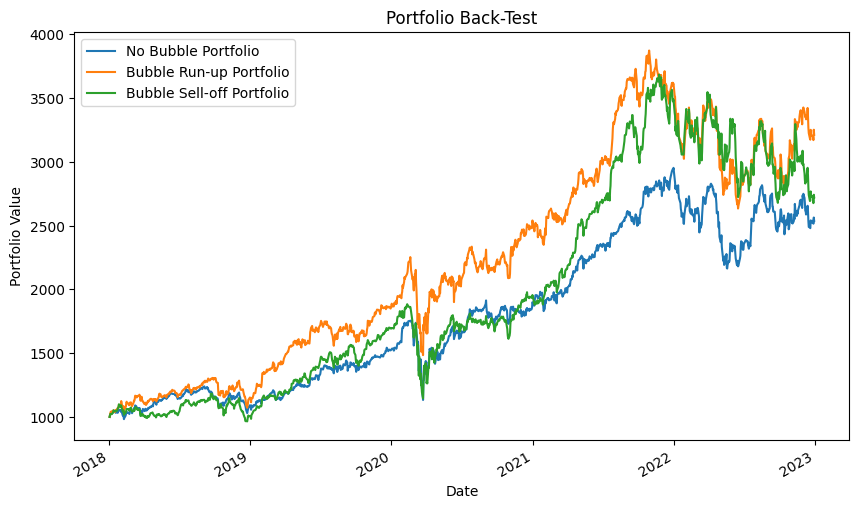

In [ ]:
def backtest_portfolio(portfolio, start_date, end_date, rebalance_freq='Q', initial_value=1000):
    # Download historical price data for the selected sectors
    prices = yf.download(portfolio.index.tolist(), start=start_date, end=end_date)['Adj Close']

    # Initialize portfolio values
    portfolio_values = []

    # Create a DataFrame to store portfolio values
    portfolio_df = pd.DataFrame(index=prices.index, columns=['Portfolio Value'])
    portfolio_df.iloc[0] = initial_value

    # Back-test loop
    for i in range(1, len(portfolio_df)):
        # Calculate the quarter-end date
        rebalance_date = portfolio_df.index[i] - pd.offsets.QuarterEnd()

        # Select equal weights for portfolio for the current date
        weights = 1/len(portfolio)

        # Calculate portfolio value based on weights and asset prices
        returns = prices.iloc[i] / prices.iloc[i - 1] - 1
        portfolio_value = portfolio_df.iloc[i - 1]['Portfolio Value'] * (1 + (weights * returns).sum())
        portfolio_df.iloc[i] = portfolio_value

    return portfolio_df

# Select 2 sectors from each portfolio
no_bubble_selected = no_bubble_portfolio.sort_values(by='Centrality', ascending=False).head(2).index
bubble_run_up_selected = bubble_run_up_portfolio.sort_values(by='Relative_score', ascending=False).head(2).index
bubble_sell_off_selected = bubble_sell_off_portfolio.sort_values(by='Relative_score', ascending=True).head(2).index

# Combine selected sectors for back-testing
selected_sectors = no_bubble_selected.union(bubble_run_up_selected).union(bubble_sell_off_selected)

# Define back-testing period
start_date_backtest = "2018-01-01"
end_date_backtest = "2023-01-01"

# Back-test each portfolio with an initial value of 1000
no_bubble_backtest = backtest_portfolio(no_bubble_portfolio.loc[no_bubble_selected], start_date_backtest, end_date_backtest, initial_value=1000)
bubble_run_up_backtest = backtest_portfolio(bubble_run_up_portfolio.loc[bubble_run_up_selected], start_date_backtest, end_date_backtest, initial_value=1000)
bubble_sell_off_backtest = backtest_portfolio(bubble_sell_off_portfolio.loc[bubble_sell_off_selected], start_date_backtest, end_date_backtest, initial_value=1000)

print("***No Bubble Portfolio***:")
print(no_bubble_selected)
print("\n***Bubble Run-up Portfolio***:")
print(bubble_run_up_selected)
print("\n***Bubble Sell-off Portfolio***:")
print(bubble_sell_off_selected)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
no_bubble_backtest['Portfolio Value'].plot(label='No Bubble Portfolio')
bubble_run_up_backtest['Portfolio Value'].plot(label='Bubble Run-up Portfolio')
bubble_sell_off_backtest['Portfolio Value'].plot(label='Bubble Sell-off Portfolio')
plt.title('Portfolio Back-Test')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()